In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import norm
from warnings import filterwarnings
filterwarnings("ignore")

# Problem 1: Clustering 


A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. In this problem statement we are given the task to identify the segments based on credit card usage.

Data Dictionary for Market Segmentation

1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [11]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [12]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [14]:
df.shape

(210, 7)

In [15]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [16]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


### Univarite analysis

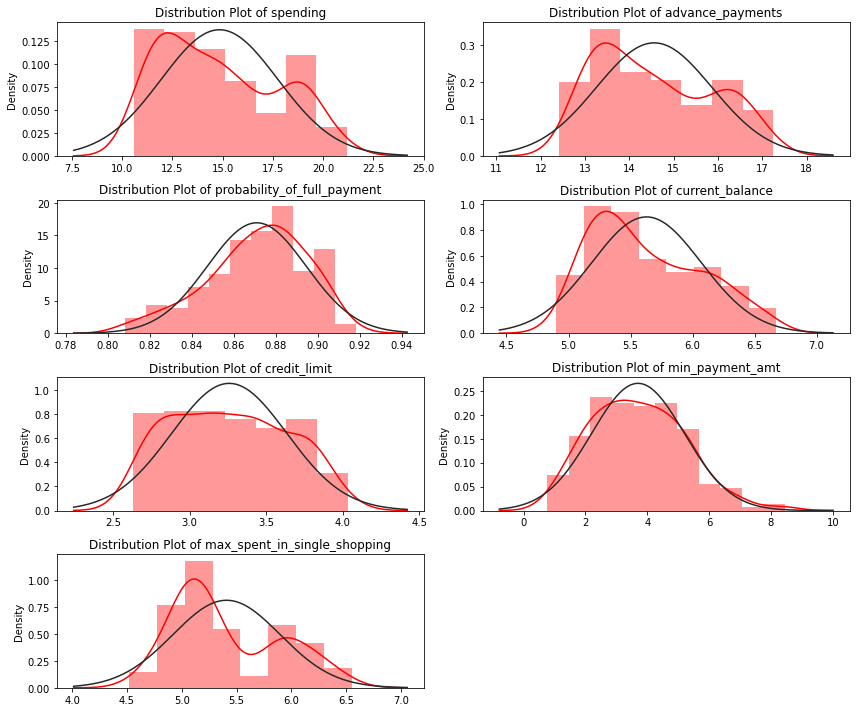

In [18]:
plt.figure(figsize = (12,10))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.distplot(x=df[feature_list[i]],color='r', fit=norm)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

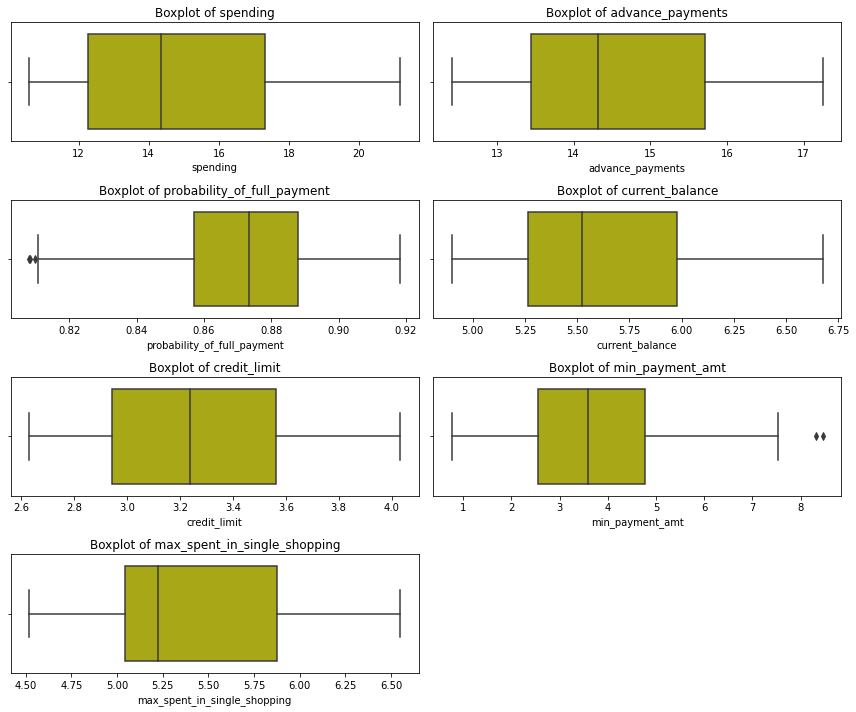

In [19]:
plt.figure(figsize = (12,10))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[feature_list[i]], data=df, orient='h', color='y')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Bivariate and Multivariate Analysis

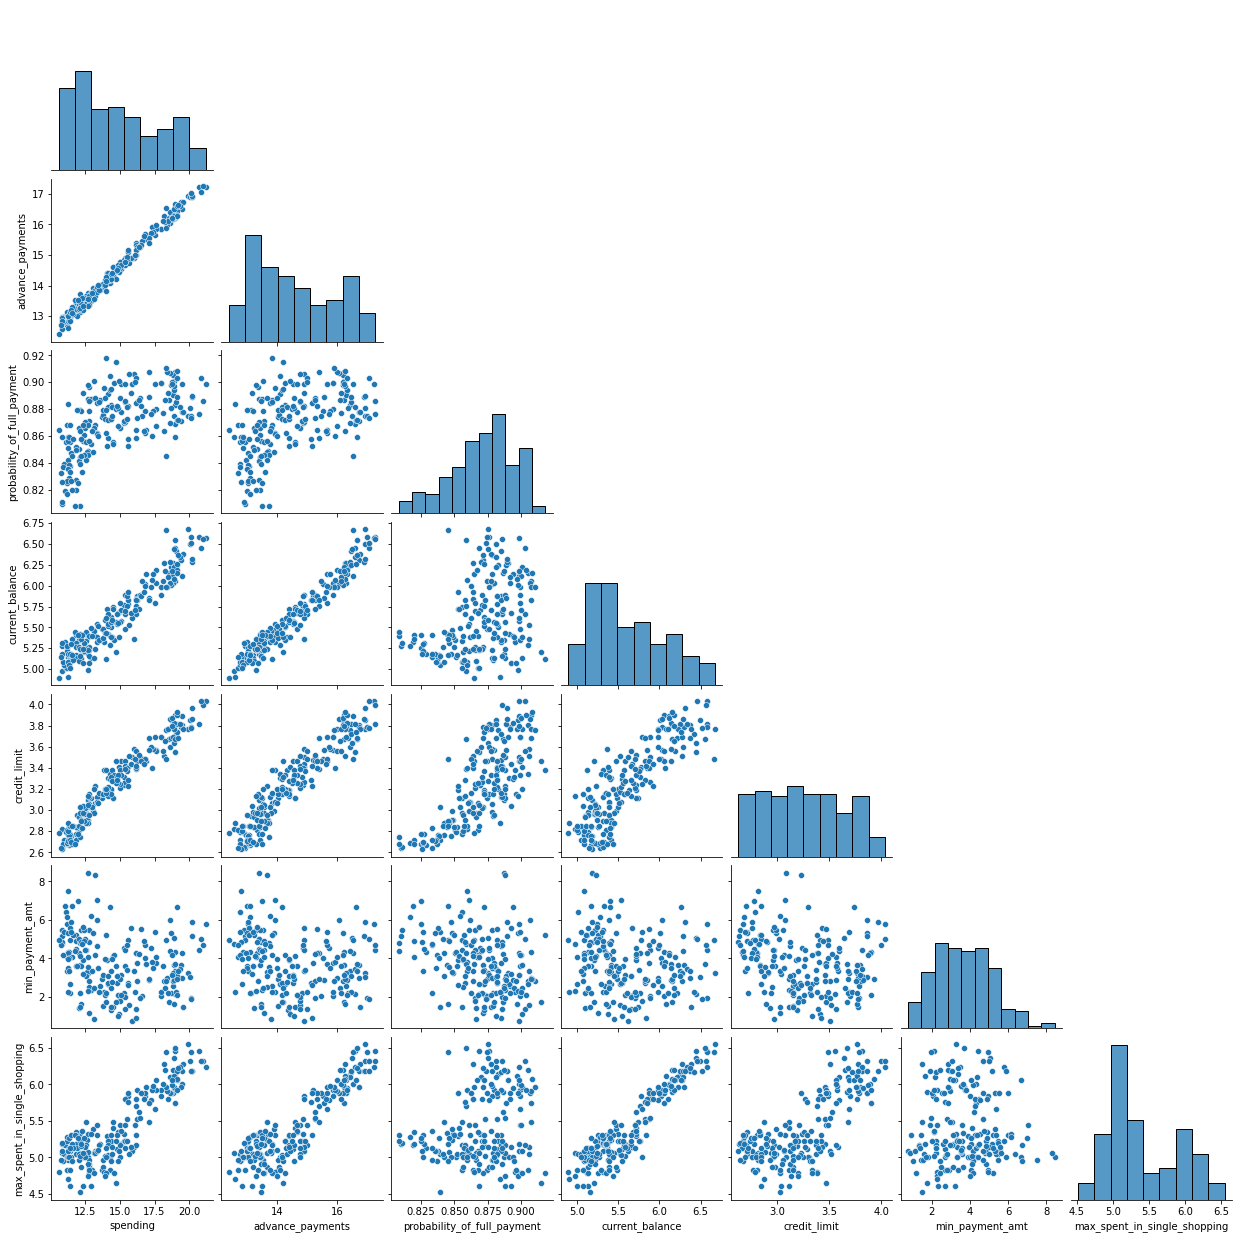

In [20]:
sns.pairplot(df, corner=True)

In [21]:
corr = df.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


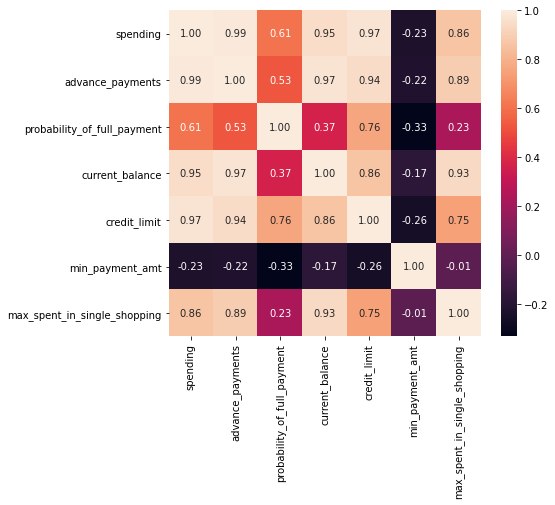

In [22]:
plt.figure(figsize=(7,6))
sns.heatmap(corr, fmt='.2f', annot=True);
plt.show()

### Skewness and Kurtosis

In [23]:
df.skew(axis = 0, skipna = True)

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [24]:
df.kurt()

spending                       -1.084266
advance_payments               -1.106703
probability_of_full_payment    -0.140315
current_balance                -0.785645
credit_limit                   -1.097697
min_payment_amt                -0.066603
max_spent_in_single_shopping   -0.840792
dtype: float64

### Outliers

In [25]:
df.probability_of_full_payment.describe()

count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64

<AxesSubplot:xlabel='probability_of_full_payment'>

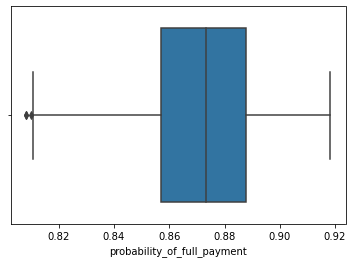

In [26]:
sns.boxplot(x=df.probability_of_full_payment)

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df['probability_of_full_payment'])
print("lower range",lr, "and upper range", ur)

lower range 0.8105875 and upper range 0.9340875


In [29]:
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>ur,ur,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lr,lr,df['probability_of_full_payment'])

<AxesSubplot:xlabel='probability_of_full_payment'>

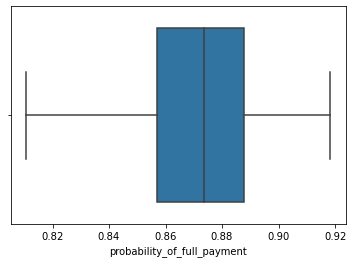

In [30]:
sns.boxplot(x=df.probability_of_full_payment)

<AxesSubplot:xlabel='min_payment_amt'>

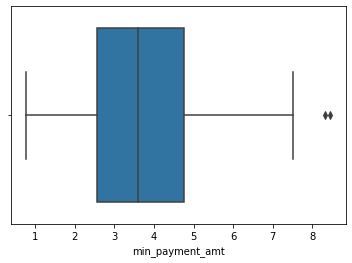

In [31]:
sns.boxplot(x=df.min_payment_amt)

In [32]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df['min_payment_amt'])
print("lower range",lr, "and upper range", ur)

lower range -0.7493749999999992 and upper range 8.079625


In [33]:
df['min_payment_amt']=np.where(df['min_payment_amt']>ur,ur,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lr,lr,df['min_payment_amt'])

<AxesSubplot:xlabel='min_payment_amt'>

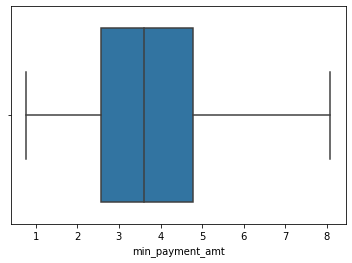

In [34]:
sns.boxplot(x=df.min_payment_amt)

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [35]:
# Let us see the variance of each variable
df.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000555
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.234095
max_spent_in_single_shopping    0.241553
dtype: float64

### Scaling 

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [37]:
scaled_df = sc.fit_transform(df)

In [38]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [39]:
scaled_df.shape

(210, 7)

In [40]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)

In [41]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Choosing ward linkage method

In [43]:
wardlink = linkage(scaled_df, method = 'ward')

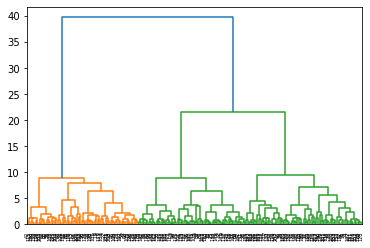

In [44]:
dend_wardlink = dendrogram(wardlink)

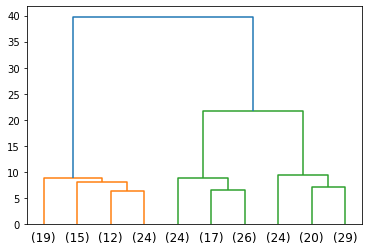

In [45]:
dend_wardlink = dendrogram(wardlink, truncate_mode='lastp', p = 10)

In [46]:
from scipy.cluster.hierarchy import fcluster

In [47]:
clusters_wdlk_3 = fcluster(wardlink, 3, criterion='maxclust')
clusters_wdlk_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [48]:
df_wl_copy = df.copy()

In [49]:
df_wl_copy['clusters-3'] = clusters_wdlk_3

In [50]:
df_wl_copy.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


### Cluster Frequency

In [51]:
df_wl_copy['clusters-3'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters-3, dtype: int64

### Cluster Profiles

In [52]:
aggdata=df_wl_copy.groupby('clusters-3').mean()
aggdata['Freq']=df_wl_copy['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


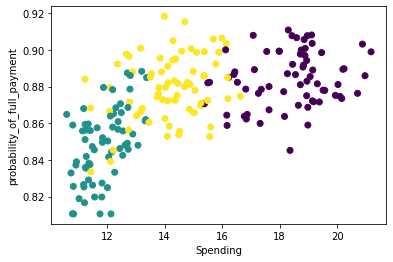

In [53]:
plt.scatter(df_wl_copy['spending'], df_wl_copy['probability_of_full_payment'], c = clusters_wdlk_3)
plt.xlabel('Spending')
plt.ylabel('probability_of_full_payment');

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [54]:
from sklearn.cluster import KMeans 

### Creating Clusters using KMeans

#### Forming 2 Clusters with K=2

In [55]:
# Create K Means cluster and store the result in the object k_means

k_means2 = KMeans(n_clusters = 2, random_state = 1)

In [56]:
# Fit K means on the scaled_df

k_means2.fit(scaled_df)
labels = k_means2.labels_

#### Cluster Output for all the observations

In [57]:
# Get the labels
k_means2.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

#### Within Cluster Sum of Squares

In [58]:
k_means2.inertia_

659.14740095485

#### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [59]:
k_means1 = KMeans(n_clusters = 1,random_state=1)
k_means1.fit(scaled_df)
k_means1.inertia_

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(scaled_df)
k_means3.inertia_

In [ ]:
k_means4 = KMeans(n_clusters = 4,random_state=1)
k_means4.fit(scaled_df)
k_means4.inertia_

In [ ]:
k_means5 = KMeans(n_clusters = 5,random_state=1)
k_means5.fit(scaled_df)
k_means5.inertia_

In [ ]:
k_means6 = KMeans(n_clusters = 6,random_state=1)
k_means6.fit(scaled_df)
k_means6.inertia_

WSS scores keep reducing as we increase the number of clusters

#### Calculating WSS for other values of K - Elbow Method

In [ ]:
wss = []

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [ ]:
wss

In [ ]:
plt.plot(range(1,11), wss)

#### Cluster evaluation for 3 clusters: The Silhouette score

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Calculating silhouette_score
labels = k_means2.labels_
silhouette_score(scaled_df, labels, random_state = 1)

In [ ]:
labels1 = k_means3.labels_
silhouette_score(scaled_df, labels1, random_state = 1)

Silhouette score is the best for 3 clusters hence we will go with 3 cluster profiling for this dataset

In [ ]:
from sklearn import metrics

In [ ]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(scaled_df)
    scores.append(metrics.silhouette_score(scaled_df, km.labels_))
    
scores

In [ ]:
#plotting the sc scores
plt.plot(k_range,scores,'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
data_df = df

In [ ]:
#Appending Clusters to the original dataset
data_df["Clus_kmeans3"] = labels1
data_df.head()

### Cluster Profiling

In [ ]:
data_df["Clus_kmeans3"].value_counts().sort_index()

In [ ]:
aggdata=data_df.groupby('Clus_kmeans3').mean()
aggdata['Freq']=data_df['Clus_kmeans3'].value_counts().sort_index()
aggdata

In [ ]:
plt.scatter(data_df['spending'], data_df['probability_of_full_payment'], c = labels1)
plt.xlabel('Spending')
plt.ylabel('probability_of_full_payment');

# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10. Age of insured (Age)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [60]:
df1 = pd.read_csv('insurance_part2_data.csv')

In [61]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [63]:
df1.shape

(3000, 10)

In [64]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [65]:
# Are there any duplicates?
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


In [66]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


### Univariate Analysis

In [67]:
df_numerical = df1[['Age', 'Duration', 'Commision', 'Sales']]
df_numerical.head()

,Age,Duration,Commision,Sales
0,48,7,0.70,2.51
1,36,34,0.00,20.00
2,39,3,5.94,9.90
3,36,4,0.00,26.00
4,33,53,6.30,18.00


In [68]:
df_categorical = df1[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]
df_categorical.head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA


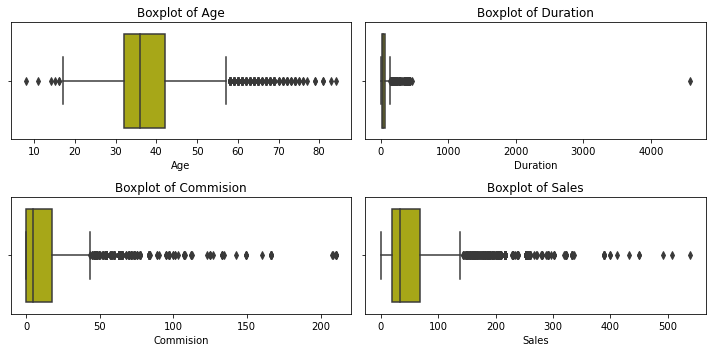

In [69]:
plt.figure(figsize = (10,5))
feature_list = df_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df_numerical[feature_list[i]],data=df_numerical, orient='h', color='y')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

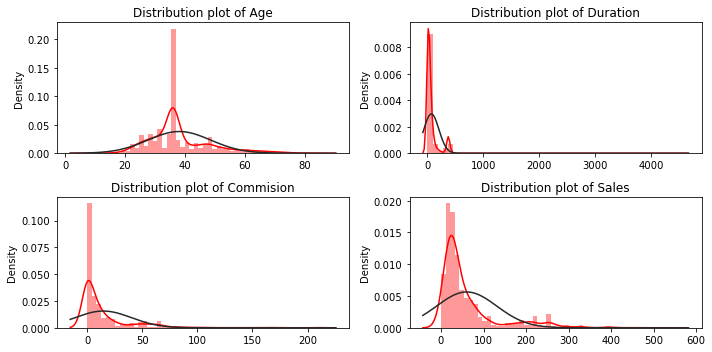

In [70]:
plt.figure(figsize = (10,5))
feature_list = df_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.distplot(x=df_numerical[feature_list[i]],color='r', fit=norm)
    plt.title('Distribution plot of {}'.format(feature_list[i]))
    plt.tight_layout()

<AxesSubplot:xlabel='Destination', ylabel='count'>

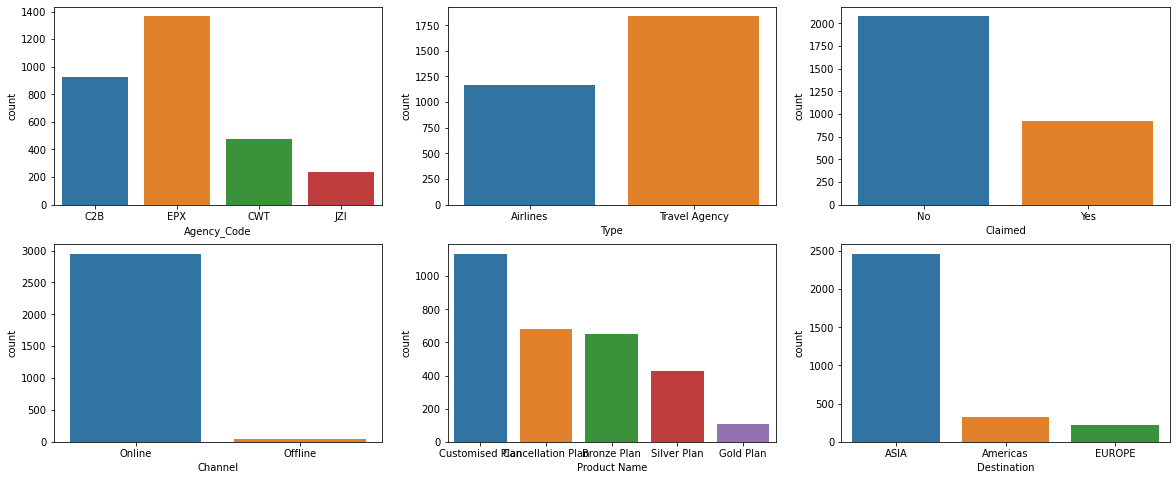

In [71]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20,8)
sns.countplot(x='Agency_Code', data=df1, ax=axes[0][0])
sns.countplot(x='Type', data=df1, ax=axes[0][1])
sns.countplot(x='Claimed', data=df1, ax=axes[0][2])
sns.countplot(x='Channel', data=df1, ax=axes[1][0])
sns.countplot(x='Product Name', data=df1, ax=axes[1][1])
sns.countplot(x='Destination', data=df1, ax=axes[1][2])

### Skewness and Kurtosis

In [72]:
df_numerical.skew(axis = 0, skipna = True)

Age           1.149713
Duration     13.784681
Commision     3.148858
Sales         2.381148
dtype: float64

In [73]:
df_numerical.kurt()

Age            1.652124
Duration     427.587926
Commision     13.984825
Sales          6.155248
dtype: float64

### Checking for outliers

In [74]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df_numerical['Age'])
print("AGE: lower range",lr, "and upper range", ur)

AGE: lower range 17.0 and upper range 57.0


In [75]:
lr,ur=remove_outlier(df_numerical['Duration'])
print("DURATION: lower range",lr, "and upper range", ur)

DURATION: lower range -67.0 and upper range 141.0


In [76]:
lr,ur=remove_outlier(df_numerical['Commision'])
print("COMMISION: lower range",lr, "and upper range", ur)

COMMISION: lower range -25.8525 and upper range 43.0875


In [77]:
lr,ur=remove_outlier(df_numerical['Sales'])
print("SALES: lower range",lr, "and upper range", ur)

SALES: lower range -53.5 and upper range 142.5


### Converting object to numerical data types

In [78]:
for column in df1[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]:
    if df1[column].dtype == 'object':
        df1[column] = pd.Categorical(df1[column]).codes 

In [79]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


### Bivariate and Multivariate Analysis

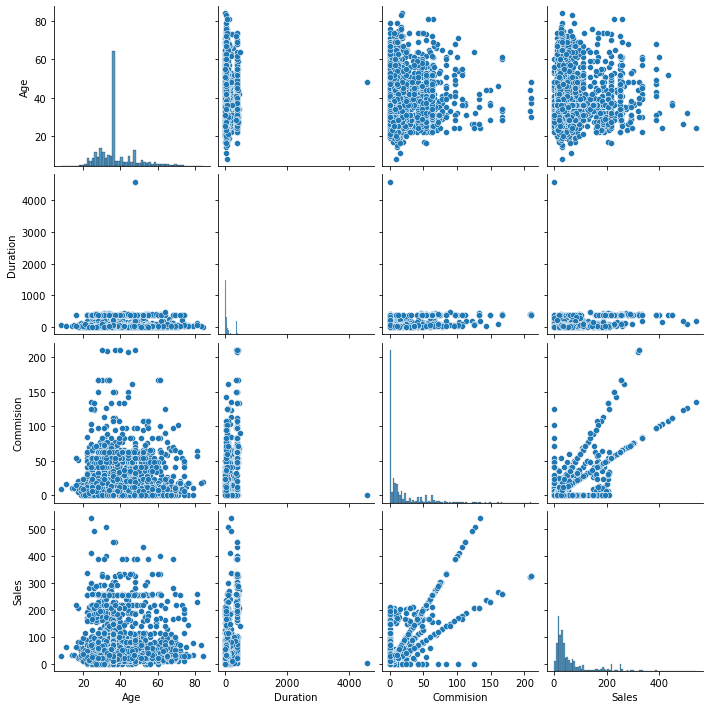

In [80]:
sns.pairplot(df_numerical)

In [81]:
corr = df_numerical.corr()
corr

,Age,Duration,Commision,Sales
Age,1.000000,0.030425,0.067717,0.039455
Duration,0.030425,1.000000,0.471389,0.558930
Commision,0.067717,0.471389,1.000000,0.766505
Sales,0.039455,0.558930,0.766505,1.000000


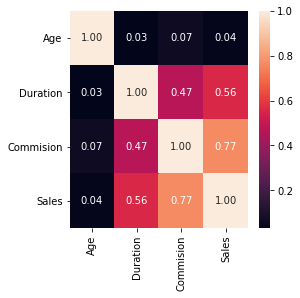

In [82]:
plt.figure(figsize=(4,4))
sns.heatmap(corr, fmt='.2f', annot=True);
plt.show()

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [83]:
X = df1.drop("Claimed", axis=1)

y = df1.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Splitting data into training and test set

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [85]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [86]:
print('Total Obs',2100+900)

Total Obs 3000


## Building a Decision Tree Classifier (CART)

In [89]:
# Initialise a Decision Tree Classifier

dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1)

In [90]:
# Fit the model

dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [91]:
from sklearn import tree

In [92]:
train_char_label = ['No', 'Yes']

In [93]:
df1_Tree_File = open('d:\df1_Tree_File.dot','w')

In [94]:
dot_data = tree.export_graphviz(dt_model, out_file=df1_Tree_File, feature_names = list(X_train),class_names = list(train_char_label))

In [95]:
df1_Tree_File.close()

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid_dt_model = {
    'criterion': ['gini'],
    'max_depth': [4,10,20,30,50],
    'min_samples_leaf': [10,20,30, 40,50,100,150], 
    'min_samples_split': [100,150,200,250,300,350],
}

grid_search_dt_model = GridSearchCV(estimator = dt_model, param_grid = param_grid_dt_model, cv = 10)

In [98]:
grid_search_dt_model.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 10, 20, 30, 50],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 100, 150],
                         'min_samples_split': [100, 150, 200, 250, 300, 350]})

In [99]:
grid_search_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 100}

### Variable Importance via CART

In [100]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.177894
Agency_Code   0.194770
Type          0.000383
Commision     0.095127
Channel       0.007262
Duration      0.262122
Sales         0.199864
Product Name  0.043258
Destination   0.019321


### Regularising the Decision Tree

In [101]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4,min_samples_leaf=20,min_samples_split=100)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=100)

### New tree

In [102]:
df1_tree_regularized = open('d:\df1_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= df1_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

df1_tree_regularized.close()

In [103]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.008015
Agency_Code   0.608859
Type          0.007533
Commision     0.022912
Channel       0.000000
Duration      0.022624
Sales         0.252286
Product Name  0.077771
Destination   0.000000


### Predicting on Training and Test dataset

In [104]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

### Getting the Predicted Classes

In [105]:
ytest_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

### Getting the Predicted Probabilities

In [106]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.432432,0.567568
2,0.432432,0.567568
3,0.184332,0.815668
4,0.937143,0.062857


## Building a Random Forest Classifier

In [107]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train, train_labels)

In [108]:
param_grid_rfcl = {
    'max_depth': [4,5,6],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [8,9,11,14],
    'min_samples_split': [45,50,55],
    'n_estimators': [200,300,350,400]
}

rfcl = RandomForestClassifier()

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)

In [109]:
grid_search_rfcl.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [8, 9, 11, 14],
                         'min_samples_split': [45, 50, 55],
                         'n_estimators': [200, 300, 350, 400]})

In [110]:
grid_search_rfcl.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 45,
 'n_estimators': 300}

In [111]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [112]:
best_grid_rfcl

RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=8,
                       min_samples_split=45, n_estimators=300)

### Predicting the Training and Testing data

In [113]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

### Predicting classes and probabilities

In [114]:
ytest_predict_rfcl

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [115]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.758230,0.241770
1,0.484904,0.515096
2,0.458413,0.541587
3,0.244168,0.755832
4,0.939217,0.060783


### Variable Importance via RF

In [116]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.050385
Agency_Code   0.348711
Type          0.030143
Commision     0.108552
Channel       0.000885
Duration      0.069450
Sales         0.171506
Product Name  0.211493
Destination   0.008874


## Building a Neural Network Classifier

In [117]:
#split data into 70% training and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=0)

In [118]:
# Checking dimensions on the train and test data
print('x_train: ',X_train.shape)
print('x_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (2100, 9)
x_test:  (900, 9)
y_train:  (2100,)
y_test:  (900,)


### Scaling the variables

In [119]:
#Initialize an object for StandardScaler

sc=StandardScaler()

In [120]:
#Scale the training data

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
X_train

array([[-0.19416819,  0.7047513 ,  0.79799046, ...,  0.09168619,
        -0.53443162,  3.03459053],
       [ 0.18753385,  1.71085446, -1.25314781, ..., -0.00417853,
        -1.32478824,  3.03459053],
       [ 0.85551243, -1.307455  , -1.25314781, ...,  2.62319957,
         1.83663824, -0.43634635],
       ...,
       [-0.48044473,  1.71085446, -1.25314781, ..., -0.53828197,
        -1.32478824, -0.43634635],
       [-0.19416819,  0.7047513 ,  0.79799046, ..., -0.83957109,
        -0.53443162, -0.43634635],
       [-1.33927433,  0.7047513 ,  0.79799046, ..., -0.46980717,
         0.255925  , -0.43634635]])

In [122]:
X_test

array([[-0.19416819,  0.7047513 ,  0.79799046, ..., -0.48350213,
        -0.53443162, -0.43634635],
       [-0.95757228, -1.307455  , -1.25314781, ...,  0.70111192,
         1.83663824, -0.43634635],
       [ 0.09210834,  1.71085446, -1.25314781, ..., -0.53828197,
        -1.32478824, -0.43634635],
       ...,
       [-0.09874268,  1.71085446, -1.25314781, ..., -0.59306181,
        -1.32478824, -0.43634635],
       [-0.19416819,  0.7047513 ,  0.79799046, ..., -0.45611221,
         0.255925  , -0.43634635],
       [ 1.90519305, -1.307455  , -1.25314781, ..., -0.62045173,
        -1.32478824, -0.43634635]])

In [123]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [124]:
# Fit the model on the training data

clf.fit(X_train, y_train)

Iteration 1, loss = 0.63730035
Iteration 2, loss = 0.62128168
Iteration 3, loss = 0.60304805
Iteration 4, loss = 0.58682060
Iteration 5, loss = 0.57338276
Iteration 6, loss = 0.56204597
Iteration 7, loss = 0.55312205
Iteration 8, loss = 0.54552263
Iteration 9, loss = 0.53925670
Iteration 10, loss = 0.53399044
Iteration 11, loss = 0.52942686
Iteration 12, loss = 0.52555525
Iteration 13, loss = 0.52231329
Iteration 14, loss = 0.51932902
Iteration 15, loss = 0.51675130
Iteration 16, loss = 0.51449045
Iteration 17, loss = 0.51253363
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [125]:
param_grid_ann = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [2500,3000,4000,5000],
    'solver': ['sgd','adam'],
    'tol': [0.01],
}

nncl = MLPClassifier(random_state=1)

grid_search_ann = GridSearchCV(estimator = nncl, param_grid = param_grid_ann, cv = 10)

In [126]:
grid_search_ann.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 200],
                         'max_iter': [2500, 3000, 4000, 5000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01]})

In [127]:
grid_search_ann.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [128]:
best_grid_ann = grid_search_ann.best_estimator_

In [129]:
best_grid_ann

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

### Predicting the Training and Testing data

In [130]:
ytrain_predict_ann = best_grid_ann.predict(X_train)
ytest_predict_ann = best_grid_ann.predict(X_test)

### Predicting classes and probabilities

In [131]:
ytest_predict_ann

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [132]:
ytest_predict_ann
ytest_predict_prob_ann=best_grid_ann.predict_proba(X_test)
ytest_predict_prob_ann
pd.DataFrame(ytest_predict_prob_ann).head()

,0,1
0,0.910760,0.089240
1,0.294991,0.705009
2,0.886421,0.113579
3,0.565048,0.434952
4,0.708259,0.291741


## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

### Accuracy via CART

In [133]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.7004761904761905

In [134]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.6722222222222223

### Accuracy via RF

In [135]:
#Train Data Accuracy
best_grid_rfcl.score(X_train,train_labels)

0.7004761904761905

In [136]:
#Test Data Accuracy
best_grid_rfcl.score(X_test,test_labels)

0.6722222222222223

### Accuracy via ANN

In [137]:
#Train Data Accuracy
best_grid_ann.score(X_train,y_train)

0.7752380952380953

In [138]:
#Test Data Accuracy
best_grid_ann.score(X_test,y_test)

0.7744444444444445

### Confusion matrix and Classification Report for CART

In [139]:
#train data
confusion_matrix(train_labels, ytrain_predict)

array([[1275,  196],
       [ 238,  391]], dtype=int64)

In [140]:
#train data
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1471
           1       0.67      0.62      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [141]:
# test data
confusion_matrix(test_labels, ytest_predict)

array([[540,  65],
       [139, 156]], dtype=int64)

In [142]:
#test data
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.53      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



### Confusion matrix and Classification Report for RF

In [143]:
#train data
confusion_matrix(train_labels, ytrain_predict_rfcl)

array([[1326,  145],
       [ 250,  379]], dtype=int64)

In [144]:
#train data
print(classification_report(train_labels, ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.60      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.81      0.81      0.81      2100



In [145]:
#test data
confusion_matrix(test_labels, ytest_predict_rfcl)

array([[552,  53],
       [151, 144]], dtype=int64)

In [146]:
#test data
print(classification_report(test_labels, ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       605
           1       0.73      0.49      0.59       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



### Confusion matrix and Classification Report for ANN

In [147]:
#train data
confusion_matrix(y_train, ytrain_predict_ann)

array([[1328,  136],
       [ 336,  300]], dtype=int64)

In [148]:
#train data
print(classification_report(y_train, ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1464
           1       0.69      0.47      0.56       636

    accuracy                           0.78      2100
   macro avg       0.74      0.69      0.70      2100
weighted avg       0.76      0.78      0.76      2100



In [149]:
#test data
confusion_matrix(y_test, ytest_predict_ann)

array([[566,  46],
       [157, 131]], dtype=int64)

In [150]:
#test data
print(classification_report(y_test, ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       612
           1       0.74      0.45      0.56       288

    accuracy                           0.77       900
   macro avg       0.76      0.69      0.71       900
weighted avg       0.77      0.77      0.76       900



### AUC and ROC for training data - CART

AUC: 0.491


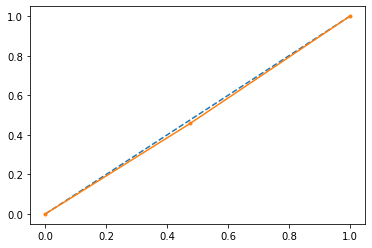

In [151]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for testing data - CART

AUC: 0.483


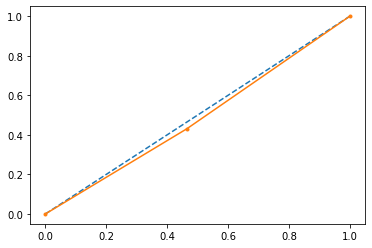

In [152]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for training data - RF

AUC: 0.496


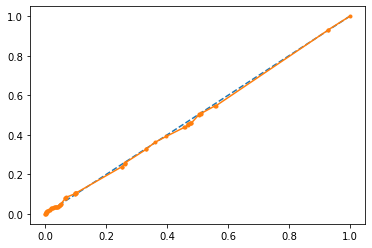

In [153]:
# predict probabilities
probs = best_grid_rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for testing data - RF

AUC: 0.472


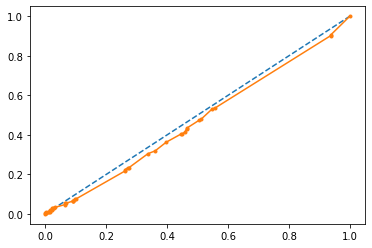

In [154]:
# predict probabilities
probs = best_grid_rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for training data - ANN

AUC: 0.804


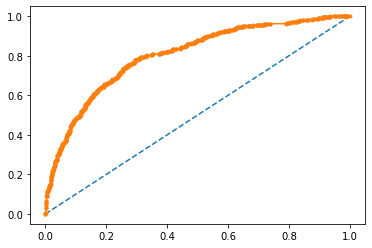

In [155]:
# predict probabilities
probs = best_grid_ann.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for testing data - ANN

AUC: 0.824


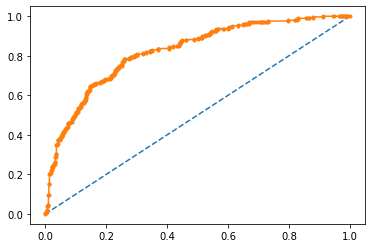

In [156]:
# predict probabilities
probs = best_grid_ann.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [157]:
data = [[0.79,0.77,0.81,0.77,0.78,0.77],[0.67,0.71,0.73,0.73,0.69,0.74],[0.62,0.53,0.58,0.47,0.47,0.45],[0.83,0.79,0.85,0.82,0.80,0.82],[0.64,0.60,0.64,0.57,0.56,0.56]]

In [158]:
cf = pd.DataFrame(data, columns = ['CART Train','CART Test','RF Train','RF Test','ANN Train','ANN Test'], index=['accuracy','precision','recall','auc_roc_score','f1score',])
cf 

,CART Train,CART Test,RF Train,RF Test,ANN Train,ANN Test
accuracy,0.79,0.77,0.81,0.77,0.78,0.77
precision,0.67,0.71,0.73,0.73,0.69,0.74
recall,0.62,0.53,0.58,0.47,0.47,0.45
auc_roc_score,0.83,0.79,0.85,0.82,0.80,0.82
f1score,0.64,0.60,0.64,0.57,0.56,0.56
